In [8]:
import os
import numpy as np
import pandas as pd

import statsmodels.api as sm
import matplotlib.pyplot as plt

In [9]:
def r2_score(y_true: np.ndarray, y_pred: np.ndarray) -> np.ndarray:
    """Calculate the R-squared score between the true values and predicted values.

    Parameters:
        y_true: The true target values.
        y_pred: The predicted target values.

    Returns:
        The R-squared score.
    """
    mean_y_true = np.mean(y_true)
    ss_total = np.sum((y_true - mean_y_true) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    r2 = 1.0 - (ss_residual / ss_total)
    return r2

In [10]:
def mean_squared_error(y_true: np.ndarray, y_pred: np.ndarray) -> np.ndarray:
    """Calculate the mean squared error between the true values and predicted values.

    Parameters:
        y_true: The true target values.
        y_pred: The predicted target values.

    Returns:
        The mean squared error value.
    """
    return np.mean((y_true - y_pred) ** 2)

## Boston house prices

Feature description:

0. **CRIM** - per capita crime rate by town
1. **ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.
2. **INDUS** - proportion of non-retail business acres per town
3. **CHAS** - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
4. **NOX** - nitric oxides concentration (parts per 10 million)
5. **RM** - average number of rooms per dwelling
6. **AGE** - proportion of owner-occupied units built prior to 1940
7. **DIS** - weighted distances to ﬁve Boston employment centers
8. **RAD** - index of accessibility to radial highways
9. **TAX** - full-value property-tax rate per \$10,000
10. **PTRATIO** - pupil-teacher ratio by town
12. **B** - 1000(Bk−0.63) 2 where Bk is the proportion of blacks by town
13. **LSTAT** - % lower status of the population
14. **MEDV** - Median value of owner-occupied homes in \$1000s. We can see that the input attributes have a mixture of units.


In [11]:
# dataset source: https://www.kaggle.com/datasets/vikrishnan/boston-house-prices

feature_names = ("CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV")
dataset = pd.read_csv(os.path.join("data", "boston_house_prices.csv"), header=None, delimiter=r"\s+", names=feature_names)
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


/var/folders/19/k034c_6d46g_5kx85n21g_l00000gn/T/ipykernel_63156/4035866204.py:5: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 10


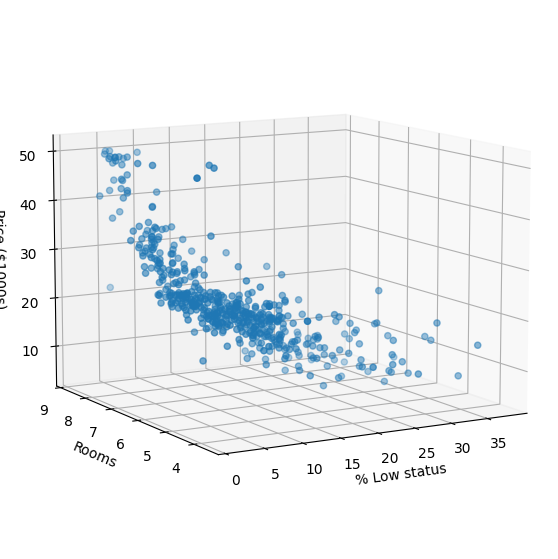

In [12]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection="3d")
ax.scatter3D(dataset["LSTAT"], dataset["RM"], dataset["MEDV"])
ax.azim = -120
ax.dist = 10
ax.elev = 10

ax.set_xlabel("% Low status")
ax.set_ylabel("Rooms")
ax.set_zlabel("Price ($1000s)");

## TASK

Побудуйте ознаки (features) на основі датасету **boston_house_prices** які б мінімізували **MSE** прогнозу ціни на житло (**MEDV**). <br>
Якщо комбінації ознак дозволяють - спробуйте зробіти візуалізації (як на прикладі вище). <br>
Спробуйте різні комбінації ознак (features), проаналізуйте отримані коефіцієнти моделі та напишіть своїми словами висновки який вплив обрані ознаки мають на мінімізацію **MSE** в блоці **Conclusion** який знаходиться нижче.

In [13]:
def build_features(data: pd.DataFrame) -> np.ndarray:
    # TODO: build features

    # Спробуйте тут поекспериментувати з різними ознаками датасету, та проаналізуйте як це вплине на модель
    # HINT: Спробуйте інтуїтивно підібрати ознаки з датасету, які, на вашу думку, можуть впливати на ціну житла
    # Нижче наведено приклад як ми можемо працювати з різними ознаками датасету

    result = np.concatenate([data[["LSTAT", "RM"]].values, (data["LSTAT"] * data["RM"]).values[..., None]], 1)
    return result

# Prepare dataset
x = build_features(dataset)
y = dataset["MEDV"].values

# Fit the model
model = sm.OLS(y, sm.add_constant(x)).fit()

# Check model performance
print("Coeffs:", model.params)
print("R2:", model.rsquared)
print("MSE:", mean_squared_error(y, model.fittedvalues))
print(model.summary())

Coeffs: [-29.12451798   2.19397626   9.70125599  -0.48494278]
R2: 0.7402460563066405
MSE: 21.928312636407025
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     476.9
Date:                Sat, 20 Jan 2024   Prob (F-statistic):          1.75e-146
Time:                        11:03:57   Log-Likelihood:                -1499.2
No. Observations:                 506   AIC:                             3006.
Df Residuals:                     502   BIC:                             3023.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------

/var/folders/19/k034c_6d46g_5kx85n21g_l00000gn/T/ipykernel_63156/49645853.py:5: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 10


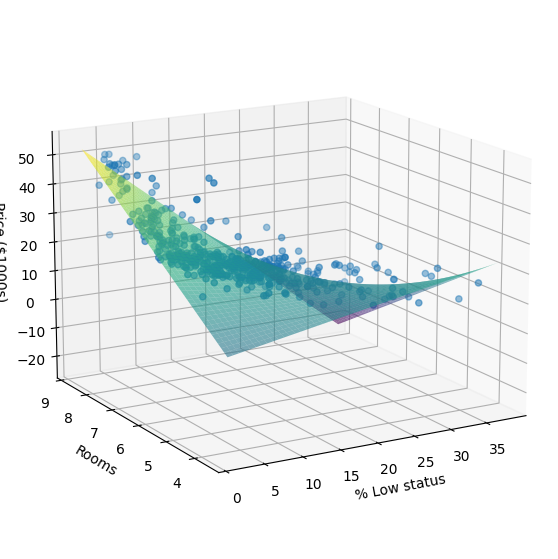

In [14]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection="3d")
ax.scatter3D(dataset["LSTAT"], dataset["RM"], dataset["MEDV"], "r")
ax.azim = -120
ax.dist = 10
ax.elev = 15

x1 = np.linspace(dataset["LSTAT"].min(), dataset["LSTAT"].max(), 100)
x2 = np.linspace(dataset["RM"].min(), dataset["RM"].max(), 100)
x1, x2 = np.meshgrid(x1, x2)
x3 = model.params[0] + x1 * model.params[1] + x2 * model.params[2] + x1 * x2 * model.params[3]
ax.plot_surface(x1, x2, x3, cmap="viridis", alpha=0.6)

ax.set_xlabel("% Low status")
ax.set_ylabel("Rooms")
ax.set_zlabel("Price ($1000s)");

### Conclusion

Висновки про **boston_house_prices** пишіть в цьому блоці.